In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bal = pd.read_excel('PROPFACT.xls')

In [86]:
bal.head()

,dist_c,street,sub,post,area,M>H,con date,set date,price,zone,prop type,primary pu,uk2,uk3,uk5,newzone
0,1,ADAMS ST,HEDDON GRETA,2321,1150.0,M,2016-10-24 00:00:00,2016-11-21,750000.0,R2,R,RESIDENCE,AAP,NaN,AK963278,0
1,1,BOWEN ST,BRANXTON,2335,850.8,M,2016-10-21 00:00:00,2016-11-18,335000.0,R3,R,RESIDENCE,MAB,NaN,AK963668,1
2,1,VIEW ST,CESSNOCK,2325,809.4,M,2016-11-25 00:00:00,2016-12-23,350000.0,R3,R,RESIDENCE,MAA,NaN,AM23622,1
3,1,ALBURY ST,ABERMAIN,2326,618.5,M,2016-11-10 00:00:00,2016-11-18,335000.0,R2,R,RESIDENCE,AAM,NaN,AK966508,0
4,1,LEONARD ST,CESSNOCK,2325,752.6,M,2016-10-05 00:00:00,2016-11-16,560000.0,R2,R,RESIDENCE,AAB,NaN,AK966068,0


In [87]:
bal

,dist_c,street,sub,post,area,M>H,con date,set date,price,zone,prop type,primary pu,uk2,uk3,uk5,newzone
0,1,ADAMS ST,HEDDON GRETA,2321,1150.000000,M,2016-10-24 00:00:00,2016-11-21,750000.0,R2,R,RESIDENCE,AAP,NaN,AK963278,0
1,1,BOWEN ST,BRANXTON,2335,850.800000,M,2016-10-21 00:00:00,2016-11-18,335000.0,R3,R,RESIDENCE,MAB,NaN,AK963668,1
2,1,VIEW ST,CESSNOCK,2325,809.400000,M,2016-11-25 00:00:00,2016-12-23,350000.0,R3,R,RESIDENCE,MAA,NaN,AM23622,1
3,1,ALBURY ST,ABERMAIN,2326,618.500000,M,2016-11-10 00:00:00,2016-11-18,335000.0,R2,R,RESIDENCE,AAM,NaN,AK966508,0
4,1,LEONARD ST,CESSNOCK,2325,752.600000,M,2016-10-05 00:00:00,2016-11-16,560000.0,R2,R,RESIDENCE,AAB,NaN,AK966068,0
5,1,YATES ST,EAST BRANXTON,2335,758.800000,M,2016-11-01 00:00:00,2016-11-25,330000.0,R2,R,RESIDENCE,AAI,NaN,AK984529,0
6,1,GRETA ST,ABERDARE,2325,1012.000000,M,2016-10-21 00:00:00,2016-11-17,140000.0,R2,V,VACANT LAND,AAD,NaN,AK953904,0
7,1,MAYFIELD ST,CESSNOCK,2325,455.000000,M,2016-10-05 00:00:00,2016-11-09,235000.0,R3,R,RESIDENCE,MAA,NaN,AK977470,1
8,1,NORTHCOTE ST,ABERDARE,2325,1012.000000,M,2016-10-14 00:00:00,2016-11-25,399500.0,R2,R,RESIDENCE,AAD,NaN,AK974941,0
9,1,LANG ST,KURRI KURRI,2327,385.700000,M,2016-10-25 00:00:00,2016-11-22,515000.0,B2,3,SHOP AND FLAT,BAD,NaN,AK956989,9999


In [88]:
#del bal['unk1']
#del bal['unit']
#del bal['pop']
#del bal['prop']


In [89]:
bal['price']=bal['price'].fillna(value=bal['price'].mean())
bal['area']=bal['area'].fillna(value=bal['area'].mean())
bal['post']=bal['post'].fillna(value='9999')

In [90]:
test=bal['zone'].unique()

In [100]:
#bal['nzone']= pd.get_dummies(data=bal['zone'])

In [101]:
#pd.get_dummies(data=bal['zone'], columns='zone')

In [93]:
def zonec(x):
    if x=='R2':
        return 0
    if x=='R3':
        return 1
    if x=='R5':
        return 2
    if x=='RU4':
        return 3
    if x=='nan':
        return 99
    if x=='R1':
        return 4
    if x=='IN1':
        return 5
    if x=='E2':
        return 6
    if x=='E3':
        return 7
    else :
        return 9999

In [94]:
bal['newzone']=bal['zone'].apply(zonec)

In [102]:
bal['newzone']

0           0
1           1
2           1
3           0
4           0
5           0
6           0
7           1
8           0
9        9999
10          0
11          2
12          2
13          3
14          0
15       9999
16       9999
17       9999
18       9999
19       9999
20          0
21          4
22          0
23          4
24          0
25          0
26          0
27          0
28          0
29          0
         ... 
65505       2
65506       4
65507    9999
65508    9999
65509       4
65510       4
65511       4
65512       4
65513       4
65514       4
65515    9999
65516    9999
65517       4
65518       4
65519       4
65520       2
65521       4
65522       4
65523       4
65524       4
65525       4
65526       4
65527    9999
65528    9999
65529       4
65530    9999
65531    9999
65532       4
65533    9999
65534       4
Name: newzone, dtype: int64

In [96]:
#from sklearn.feature_extraction.text import CountVectorizer

In [97]:
#bow_transformer = CountVectorizer(bal['zone'])

In [98]:
#bow_transformer.transform('teete')

In [103]:
bal.describe()

,dist_c,area,price,newzone
count,65535.000000,65535.000000,6.553500e+04,65535.000000
mean,175.886580,647.848236,1.196092e+06,5798.116381
std,163.824091,937.637475,6.697136e+06,4934.759974
min,1.000000,0.800000,1.000000e+02,0.000000
25%,89.000000,172.000000,4.220000e+05,1.000000
50%,140.000000,637.700000,6.200000e+05,9999.000000
75%,214.000000,647.848236,8.750000e+05,9999.000000
max,902.000000,33431.190000,4.450000e+08,9999.000000


In [64]:
#del bal['unk1']
#del bal['uk1']
#del bal['pop']
#del bal['uk4']
#del bal['areax']

TypeError: unorderable types: float() <= str()

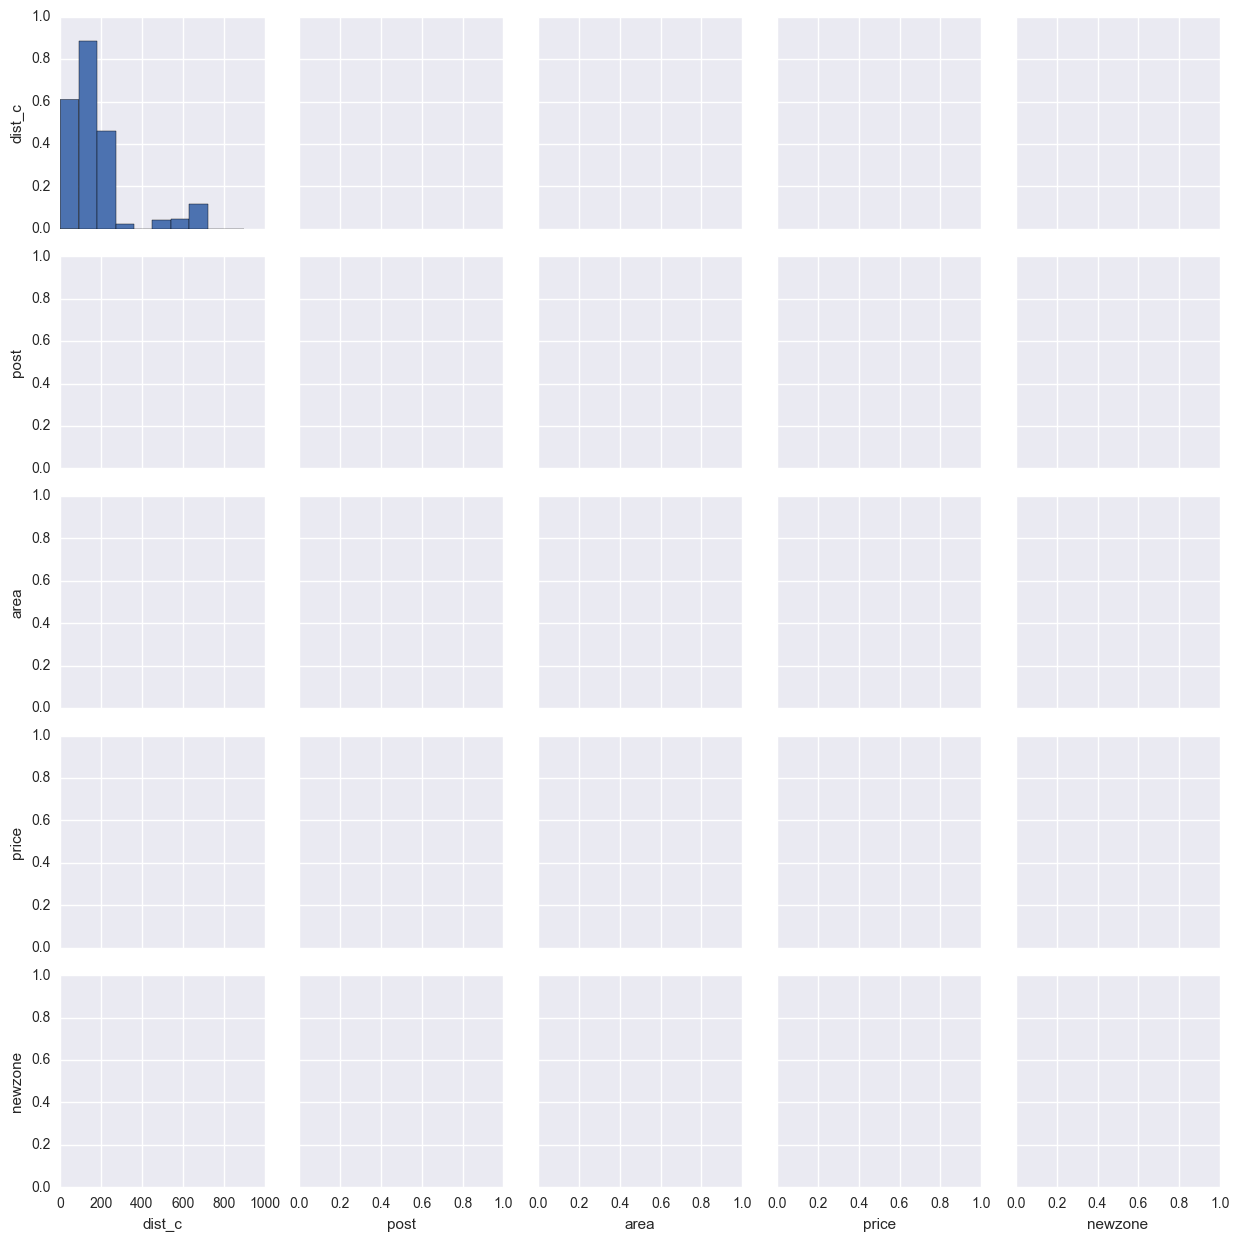

In [65]:
sns.pairplot(bal)

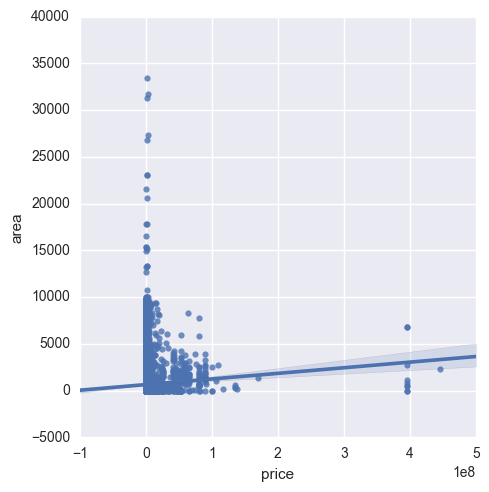

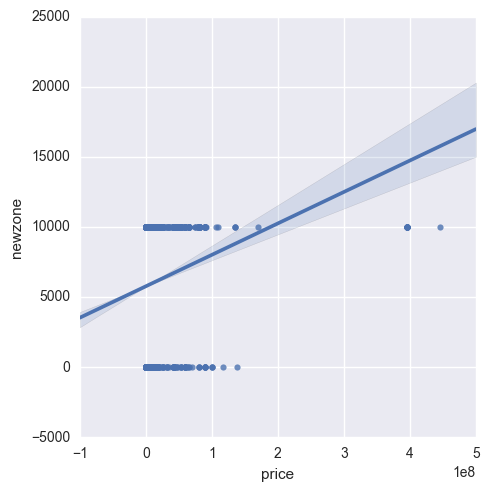

In [66]:
sns.lmplot(x='price',y='area',data=bal)
sns.lmplot(x='price',y='newzone',data=bal)

/Users/narasimhamurthy/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


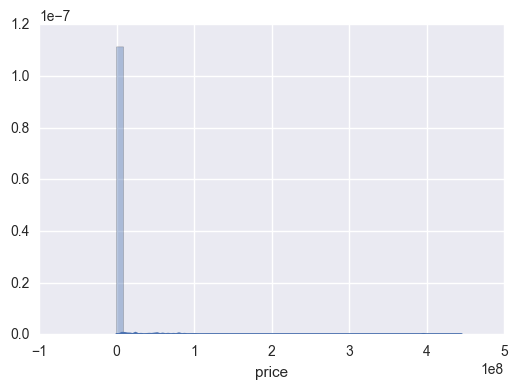

In [35]:
sns.distplot(bal['price'])

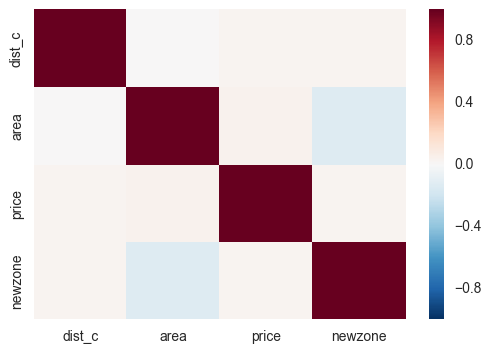

In [36]:
sns.heatmap(bal.corr())

In [105]:
#bal[np.isfinite(bal) == True] = 0

In [104]:
X=bal[['area','newzone','dist_c']]
#X=bal['post']

y=bal['price']

In [135]:
#X=X.reshape(-1,1)
#from sklearn.model_selection import train_test_split    - not avaialbe
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [40]:
from sklearn.cross_validation import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=110)

In [42]:
#X.reshape(-1,1)

In [43]:
from sklearn.linear_model import LinearRegression
# pipeline  - Scaling
# Regularasation

In [136]:
# Just do scalling
#StandardScaler(X)
preprocessing.minmax_scale(X)

array([[  3.43759077e-02,   0.00000000e+00,   0.00000000e+00],
       [  2.54259672e-02,   1.00010001e-04,   0.00000000e+00],
       [  2.41875730e-02,   1.00010001e-04,   0.00000000e+00],
       ..., 
       [  1.60542548e-02,   4.00040004e-04,   6.65926748e-03],
       [  4.99007041e-02,   1.00000000e+00,   6.65926748e-03],
       [  3.02479271e-02,   4.00040004e-04,   6.65926748e-03]])

In [129]:
#lm = LinearRegression()
lm_scaled= make_pipeline(StandardScaler(),LinearRegression() )
lm_scaled

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [130]:
lm.fit(X_train,y_train)
lm_scaled.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [133]:
lm.coef_
#coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'] 

array([  376.43211873,    55.63680636,  1292.62237421])

In [116]:
pred = lm.predict(X_test)
pred_scaled = lm_scaled.predict(X_test)

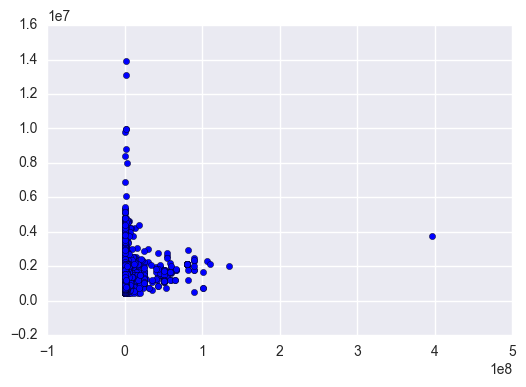

In [119]:
plt.scatter(y_test,pred)
#plt.scatter(y_test,pred_scaled)

/Users/narasimhamurthy/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


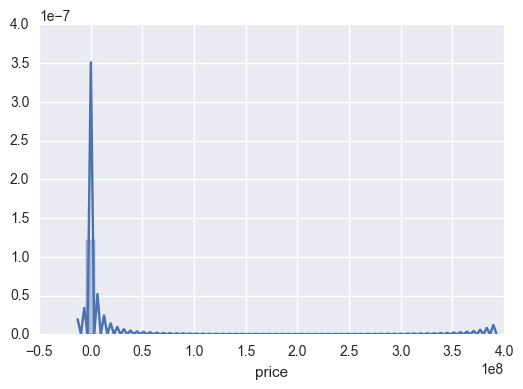

In [120]:
sns.distplot((y_test-pred),bins=50);

In [121]:
from sklearn import metrics

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1097729.0848
MSE: 2.50894671093e+13
RMSE: 5008938.72086


In [123]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_scaled))
print('MSE:', metrics.mean_squared_error(y_test, pred_scaled))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_scaled)))

MAE: 1097729.0848
MSE: 2.50894671093e+13
RMSE: 5008938.72086


In [127]:
# print('MAE:', metrics.accuracy_score(y_test, pred_scaled))
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred )))

ValueError: continuous is not supported